# **Edges and Nodes**

In [19]:
!pip install -q langgraph

**State**

In [20]:
from typing import TypedDict
class LearningState(TypedDict):
  prompt: str

In [21]:
learning_state = LearningState(prompt="Hello from Anas Malik")

In [23]:
learning_state

{'prompt': 'Hello from Anas Malik'}

In [25]:
learning_state["prompt"]

'Hello from Anas Malik'

In [26]:
learning_state["prompt"] + " I am happy."

'Hello from Anas Malik I am happy.'

In [28]:
print(learning_state["prompt"])
print(type(learning_state))

Hello from Anas Malik
<class 'dict'>


**Nodes**

In [36]:
def node_1(state: LearningState) -> LearningState:
  print("---NODE 1 STATE---", state)
  return {"prompt": state["prompt"] + " " + "I am"}

def node_2(state: LearningState) -> LearningState:
  print("---NODE 2 STATE---", state)
  return {"prompt": state["prompt"] + " " + "Happy"}

def node_3(state: LearningState) -> LearningState:
  print("---NODE 3 STATE---", state)
  return {"prompt": state["prompt"] + " " + "Absolutely."}

**Edges**

In [30]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph

In [37]:
# Build graph
builder = StateGraph(state_schema=LearningState)

# Add Nodes
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Add Edges
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", "node_3")
builder.add_edge("node_3", END)

# Compile
graph: CompiledStateGraph = builder.compile()

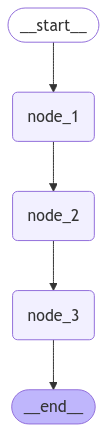

In [38]:
# Visualize Graph
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [39]:
# Invoke
graph.invoke({"prompt": "Hello"})

---NODE 1 STATE--- {'prompt': 'Hello'}
---NODE 2 STATE--- {'prompt': 'Hello I am'}
---NODE 3 STATE--- {'prompt': 'Hello I am Happy'}


{'prompt': 'Hello I am Happy Absolutely.'}

# **LLM in Node**

In [40]:
%pip install -q -U langchain
%pip install -q -U langchain-google-genai

In [42]:
import os
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
os.environ["GOOGLE_API_KEY"]=GEMINI_API_KEY

In [43]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0)

In [46]:
# Import the AIMessage class currently will be used for typing
from langchain_core.messages.ai import AIMessage

ai_msg: AIMessage = llm.invoke("Hi?")

In [47]:
print(ai_msg.content)
print(type(ai_msg.content))

Hi there! How can I help you today?
<class 'str'>


In [45]:
from typing_extensions import TypedDict

class FirstLLMAgentCall(TypedDict):
  user_input: str
  output: str

In [48]:
def node_1(state: FirstLLMAgentCall):
  print("---NODE 1---", state)
  user_input = state["user_input"]
  ai_msg = llm.invoke(user_input)
  return {"output": ai_msg.content}

In [49]:
# building graph
builder = StateGraph(FirstLLMAgentCall)

# Add Node
builder.add_node("node_1", node_1)

# Add Edges
builder.add_edge(START, "node_1")
builder.add_edge("node_1", END)

# Compile
graph: CompiledStateGraph = builder.compile()

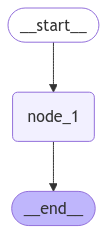

In [50]:
# Visualize Graph
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [52]:
# Invoke
graph.invoke({"user_input": "Hello"})

---NODE 1--- {'user_input': 'Hello'}


{'user_input': 'Hello', 'output': 'Hello! How can I help you today?'}

In [54]:
# Invoke
graph.invoke({"user_input": "Motivate me to learn LangGraph"})

---NODE 1--- {'user_input': 'Motivate me to learn LangGraph'}


{'user_input': 'Motivate me to learn LangGraph',
 'output': "Okay, let's get you excited about learning LangGraph! Here's a breakdown of why LangGraph is worth your time, focusing on the problems it solves and the benefits it offers:\n\n**The Core Problem: Building Complex, Reliable, and Scalable LLM Applications**\n\nThink about the limitations of basic LLM chains:\n\n*   **Linearity:**  They're often just a sequence of steps.  What if you need branching logic, loops, or error handling?\n*   **Limited State Management:**  Passing information between steps can become cumbersome, especially with complex dependencies.\n*   **Debugging and Monitoring:**  Understanding *why* your LLM application is failing can be a nightmare.  It's hard to trace the flow of information and identify bottlenecks.\n*   **Scalability:**  Simple chains might work for small tasks, but they often struggle to handle high volumes of requests or complex workflows.\n*   **Agent Orchestration:** Building agents that c

In [55]:
result = graph.invoke({"user_input": "Motivate me to learn LangGraph"})

---NODE 1--- {'user_input': 'Motivate me to learn LangGraph'}


In [56]:
# just another helpter function
import textwrap
from IPython.display import display, Markdown

def to_markdown(text)-> Markdown:
    text : str = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [58]:
print("PROMPT: ", result['user_input'])
to_markdown(result['output'])

PROMPT:  Motivate me to learn LangGraph


> Okay, let's get you excited about learning LangGraph! Here's a breakdown of why LangGraph is worth your time, focusing on the problems it solves and the benefits it offers:
> 
> **The Core Problem: Building Complex, Reliable, and Scalable LLM Applications**
> 
> Think about the limitations of basic LLM chains:
> 
> *   **Linearity:**  They're often just a sequence of steps.  What if you need branching logic, loops, or error handling?
> *   **Limited State Management:**  Passing information between steps can become cumbersome, especially with complex dependencies.
> *   **Debugging and Monitoring:**  Understanding *why* your LLM application is failing can be a nightmare.  It's hard to trace the flow of information and identify bottlenecks.
> *   **Scalability:**  Simple chains might work for small tasks, but they often struggle to handle high volumes of requests or complex workflows.
> *   **Agent Orchestration:** Building agents that can reason, plan, and execute complex tasks requires more than just a simple chain. You need a way to manage their state, goals, and interactions with tools.
> 
> **LangGraph is the Solution: A Powerful Framework for Building LLM Graphs**
> 
> LangGraph addresses these problems by providing a way to represent your LLM application as a **graph**.  Think of it like a flowchart for your LLM logic.  This unlocks a whole new level of power and flexibility:
> 
> *   **Graph-Based Architecture:**
>     *   **Nodes:** Represent individual steps in your workflow (e.g., calling an LLM, retrieving data, running a function).
>     *   **Edges:** Define the connections between nodes, specifying the flow of information and control.
>     *   **State:**  A central store for managing data that persists throughout the execution of the graph.
> 
> *   **Key Benefits of Using LangGraph:**
> 
>     *   **Complex Logic:**  Easily implement branching, loops, conditional execution, and other advanced control flow patterns.  No more struggling with nested `if` statements and convoluted chains.
>     *   **State Management:**  The graph's state allows you to track the progress of your application, store intermediate results, and make decisions based on the current context.  This is crucial for building conversational agents and other stateful applications.
>     *   **Improved Debugging and Monitoring:**  The graph structure makes it easier to visualize the flow of execution, identify bottlenecks, and understand why your application is behaving in a certain way.  You can trace the path of data through the graph and inspect the state at each step.
>     *   **Enhanced Scalability:**  The modular nature of graphs makes it easier to scale your LLM applications.  You can break down complex tasks into smaller, independent nodes that can be executed in parallel.
>     *   **Agent Orchestration:** LangGraph is particularly well-suited for building agents. You can use it to define the agent's planning process, tool selection logic, and interaction with the environment.
>     *   **Modularity and Reusability:**  Nodes and edges can be easily reused across different graphs, promoting code reuse and reducing development time.
>     *   **Clearer Code:**  Graph-based code is often more readable and maintainable than complex chains, especially for intricate workflows.
>     *   **Experimentation:**  LangGraph makes it easier to experiment with different architectures and algorithms.  You can quickly modify the graph structure to test new ideas and optimize your application's performance.
> 
> **Why You Should Be Excited to Learn LangGraph:**
> 
> *   **Future-Proof Your Skills:**  As LLM applications become more sophisticated, graph-based architectures will become increasingly important.  Learning LangGraph now will give you a competitive edge in the field.
> *   **Build More Powerful Applications:**  Unlock the ability to create LLM applications that were previously impossible or impractical to build with simple chains.
> *   **Solve Real-World Problems:**  Tackle complex tasks like:
>     *   **Building sophisticated conversational agents:**  Handle complex dialogues, manage user context, and integrate with external tools.
>     *   **Automating complex workflows:**  Orchestrate multiple LLM calls, data retrieval steps, and function executions to automate tasks like document processing, data analysis, and report generation.
>     *   **Creating personalized experiences:**  Tailor LLM responses based on user preferences, historical data, and real-time context.
>     *   **Developing autonomous agents:**  Build agents that can plan, reason, and execute complex tasks in dynamic environments.
> *   **Join a Growing Community:**  The LangChain ecosystem is vibrant and active.  You'll find plenty of resources, support, and inspiration from other developers.
> 
> **Practical Motivation:**
> 
> *   **Start Small:** Don't try to learn everything at once. Begin with a simple example, like a basic question-answering system with a loop for clarification.
> *   **Find a Project:**  Think about a problem you're interested in solving with LLMs.  This will give you a concrete goal to work towards and keep you motivated.
> *   **Follow Tutorials and Examples:**  LangChain provides excellent documentation and examples.  Start by working through these and then adapt them to your own projects.
> *   **Contribute to the Community:**  Share your knowledge, ask questions, and contribute to open-source projects.  This is a great way to learn and connect with other developers.
> 
> **In short, LangGraph is a game-changer for building complex, reliable, and scalable LLM applications.  It's a powerful tool that will empower you to create innovative solutions and stay ahead of the curve in the rapidly evolving field of AI.**
> 
> So, dive in, experiment, and start building! You'll be amazed at what you can achieve with LangGraph. Good luck!